# AlexNet

### Introduction

>AlexNet was designed by Hinton, winner of the 2012 ImageNet competition, and his student Alex Krizhevsky.
- AlexNet was much larger than previous CNNs used for computer vision tasks ( e.g. Yann LeCun’s LeNet paper in 1998). It has 60 million parameters and 650,000 neurons and took five to six days to train on two GTX 580 3GB GPUs. Today there are much more complex CNNs that can run on faster GPUs very efficiently even on very large datasets. But back in 2012, this was huge!

Let’s look at the architecture. You can click on the image below to enlarge it.

>The following table below explains the network structure of AlexNet:

https://learnopencv.com/understanding-alexnet/  
# 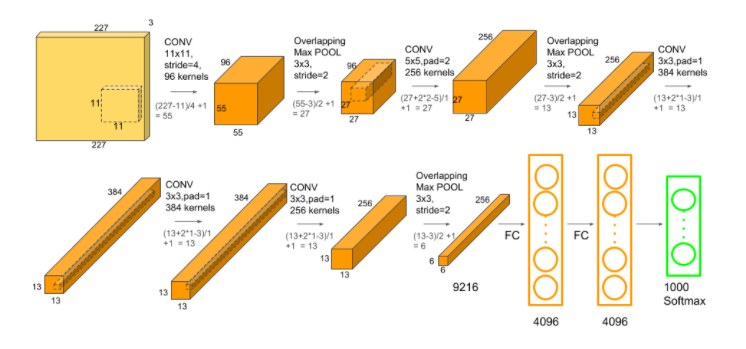 
- Multiple Convolutional Kernels (a.k.a filters) extract interesting features in an image. In a single convolutional layer, there are usually many kernels of the same size. For example, the first Conv Layer of AlexNet contains 96 kernels of size 11x11x3. Note the width and height of the kernel are usually the same and the depth is the same as the number of channels.

- The first two Convolutional layers are followed by the Overlapping Max Pooling layers that we describe next. The third, fourth and fifth convolutional layers are connected directly. The fifth convolutional layer is followed by an Overlapping Max Pooling layer, the output of which goes into a series of two fully connected layers. The second fully connected layer feeds into a softmax classifier with 1000 class labels.

- ReLU nonlinearity is applied after all the convolution and fully connected layers. The ReLU nonlinearity of the first and second convolution layers are followed by a local normalization step before doing pooling. But researchers later didn’t find normalization very useful. So we will not go in detail over that.

## Overlapping Max Pooling
- Max Pooling layers are usually used to downsample the width and height of the tensors, keeping the depth same. Overlapping Max Pool layers are similar to the Max Pool layers, except the adjacent windows over which the max is computed overlap each other. The authors used pooling windows of size 3×3 with a stride of 2 between the adjacent windows. This overlapping nature of pooling helped reduce the top-1 error rate by 0.4% and top-5 error rate by 0.3% respectively when compared to using non-overlapping pooling windows of size 2×2 with a stride of 2 that would give same output dimensions.




<table>
<thead>
	<tr>
		<th>Size / Operation</th>
		<th>Filter</th>
		<th>Depth</th>
		<th>Stride</th>
		<th>Padding</th>
		<th>Number of Parameters</th>
		<th>Forward Computation</th>
	</tr>
</thead>
<tbody>
	<tr>
		<td>3* 227 * 227</td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
	</tr>
	<tr>
		<td>Conv1 + Relu</td>
		<td>11 * 11</td>
		<td>96</td>
		<td>4</td>
		<td></td>
		<td>(11*11*3 + 1) * 96=34944</td>
		<td>(11*11*3 + 1) * 96 * 55 * 55=105705600</td>
	</tr>
	<tr>
		<td>96 * 55 * 55</td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
	</tr>
	<tr>
		<td>Max Pooling</td>
		<td>3 * 3</td>
		<td></td>
		<td>2</td>
		<td></td>
		<td></td>
		<td></td>
	</tr>
	<tr>
		<td>96 * 27 * 27</td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
	</tr>
	<tr>
		<td>Norm</td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
	</tr>
	<tr>
		<td>Conv2 + Relu</td>
		<td>5 * 5</td>
		<td>256</td>
		<td>1</td>
		<td>2</td>
		<td>(5 * 5 * 96 + 1) * 256=614656</td>
		<td>(5 * 5 * 96 + 1) * 256 * 27 * 27=448084224</td>
	</tr>
	<tr>
		<td>256 * 27 * 27</td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
	</tr>
	<tr>
		<td>Max Pooling</td>
		<td>3 * 3</td>
		<td></td>
		<td>2</td>
		<td></td>
		<td></td>
		<td></td>
	</tr>
	<tr>
		<td>256 * 13 * 13</td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
	</tr>
	<tr>
		<td>Norm</td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
	</tr>
	<tr>
		<td>Conv3 + Relu</td>
		<td>3 * 3</td>
		<td>384</td>
		<td>1</td>
		<td>1</td>
		<td>(3 * 3 * 256 + 1) * 384=885120</td>
		<td>(3 * 3 * 256 + 1) * 384 * 13 * 13=149585280</td>
	</tr>
	<tr>
		<td>384 * 13 * 13</td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
	</tr>
	<tr>
		<td>Conv4 + Relu</td>
		<td>3 * 3</td>
		<td>384</td>
		<td>1</td>
		<td>1</td>
		<td>(3 * 3 * 384 + 1) * 384=1327488</td>
		<td>(3 * 3 * 384 + 1) * 384 * 13 * 13=224345472</td>
	</tr>
	<tr>
		<td>384 * 13 * 13</td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
	</tr>
	<tr>
		<td>Conv5 + Relu</td>
		<td>3 * 3</td>
		<td>256</td>
		<td>1</td>
		<td>1</td>
		<td>(3 * 3 * 384 + 1) * 256=884992</td>
		<td>(3 * 3 * 384 + 1) * 256 * 13 * 13=149563648</td>
	</tr>
	<tr>
		<td>256 * 13 * 13</td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
	</tr>
	<tr>
		<td>Max Pooling</td>
		<td>3 * 3</td>
		<td></td>
		<td>2</td>
		<td></td>
		<td></td>
		<td></td>
	</tr>
	<tr>
		<td>256 * 6 * 6</td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
	</tr>
	<tr>
		<td>Dropout (rate 0.5)</td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
	</tr>
	<tr>
		<td>FC6 + Relu</td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td>256 * 6 * 6 * 4096=37748736</td>
		<td>256 * 6 * 6 * 4096=37748736</td>
	</tr>
	<tr>
		<td>4096</td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
	</tr>
	<tr>
		<td>Dropout (rate 0.5)</td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
	</tr>
	<tr>
		<td>FC7 + Relu</td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td>4096 * 4096=16777216</td>
		<td>4096 * 4096=16777216</td>
	</tr>
	<tr>
		<td>4096</td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
	</tr>
	<tr>
		<td>FC8 + Relu</td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td>4096 * 1000=4096000</td>
		<td>4096 * 1000=4096000</td>
	</tr>
	<tr>
		<td>1000 classes</td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
	</tr>
	<tr>
		<td>Overall</td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td>62369152=62.3 million</td>
		<td>1135906176=1.1 billion</td>
	</tr>
	<tr>
		<td>Conv VS FC</td>
		<td></td>
		<td></td>
		<td></td>
		<td></td>
		<td>Conv:3.7million (6%) , FC: 58.6 million  (94% )</td>
		<td>Conv: 1.08 billion (95%) , FC: 58.6 million (5%)</td>
	</tr>
</tbody>
</table>





## ReLU Nonlinearity  
- An important feature of the AlexNet is the use of ReLU(Rectified Linear Unit) Nonlinearity. Tanh or sigmoid activation functions used to be the usual way to train a neural network model. AlexNet showed that using ReLU nonlinearity, deep CNNs could be trained much faster than using the saturating activation functions like tanh or sigmoid. The figure below from the paper shows that using ReLUs(solid curve), AlexNet could achieve a 25% training error rate six times faster than an equivalent network using tanh(dotted curve). This was tested on the CIFAR-10 dataset. 

Lets see why it trains faster with the ReLUs. The ReLU function is given by   

f(x) = max(0,x)  

- The tanh function saturates at very high or very low values of z. At these regions, the slope of the function goes very close to zero. This can slow down gradient descent. On the other hand the ReLU function’s slope is not close to zero for higher positive values of z. This helps the optimization to converge faster. For negative values of z, the slope is still zero, but most of the neurons in a neural network usually end up having positive values. ReLU wins over the sigmoid function too for the same reason.

#### Why does AlexNet achieve better results?

1. **Relu activation function is used.**

Relu function: f (x) = max (0, x)


ReLU-based deep convolutional networks are trained several times faster than tanh and sigmoid- based networks. The following figure shows the number of iterations for a four-layer convolutional network based on CIFAR-10 that reached 25% training error in tanh and ReLU:


2. **Standardization ( Local Response Normalization )**

After using ReLU f (x) = max (0, x), you will find that the value after the activation function has no range like the tanh and sigmoid functions, so a normalization will usually be done after ReLU, and the LRU is a steady proposal (Not sure here, it should be proposed?) One method in neuroscience is called "Lateral inhibition", which talks about the effect of active neurons on its surrounding neurons.

3. **Dropout**

Dropout is also a concept often said, which can effectively prevent overfitting of neural networks. Compared to the general linear model, a regular method is used to prevent the model from overfitting. In the neural network, Dropout is implemented by modifying the structure of the neural network itself. For a certain layer of neurons, randomly delete some neurons with a defined probability, while keeping the individuals of the input layer and output layer neurons unchanged, and then update the parameters according to the learning method of the neural network. In the next iteration, rerandom Remove some neurons until the end of training.


4. **Enhanced Data ( Data Augmentation )**

**In deep learning, when the amount of data is not large enough, there are generally 4 solutions:**

>  Data augmentation- artificially increase the size of the training set-create a batch of "new" data from existing data by means of translation, flipping, noise

>  Regularization——The relatively small amount of data will cause the model to overfit, making the training error small and the test error particularly large. By adding a regular term after the Loss Function , the overfitting can be suppressed. The disadvantage is that a need is introduced Manually adjusted hyper-parameter.

>  Dropout- also a regularization method. But different from the above, it is achieved by randomly setting the output of some neurons to zero

>  Unsupervised Pre-training- use Auto-Encoder or RBM's convolution form to do unsupervised pre-training layer by layer, and finally add a classification layer to do supervised Fine-Tuning






### Code Implementation

In [ ]:
!pip install tflearn 

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
np.random.seed(1000)

# (2) Get Data
import tflearn.datasets.oxflower17 as oxflower17
x, y = oxflower17.load_data(one_hot=True)

# (3) Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(17))
model.add(Activation('softmax'))

model.summary()

# (4) Compile 
model.compile(loss='categorical_crossentropy', optimizer='adam',\
 metrics=['accuracy'])

# (5) Train
model.fit(x, y, batch_size=64, epochs=1, verbose=1, \
validation_split=0.2, shuffle=True)

Using TensorFlow backend.


curses is not supported on this machine (please install/reinstall curses for an optimal experience)
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
activation_1 (Activation)    (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 256)     

UnknownError: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d_1/convolution}}]]
	 [[{{node loss/mul}}]]